In [2]:
#1.	Load and view data
import pandas as pd
df = pd.read_csv("/content/Retail_Dataset.csv")
print(df)
#display the first 5 rows.
a = df.head(5)
print(a)

     OrderID     Product  Quantity  Price  Sales Customer   OrderDate
0       1001  Headphones         4   2500  10000   George  03-04-2025
1       1002    Keyboard         4   1500   6000   George  21-01-2025
2       1003       Mouse         3    500   1500      Bob  16-03-2025
3       1004     Printer         4   8000  32000   Hannah  14-04-2025
4       1005    Keyboard         2   1500   3000    Alice  22-02-2025
..       ...         ...       ...    ...    ...      ...         ...
195     1196     Monitor         2  10000  20000      Bob  16-06-2025
196     1197       Mouse         2    500   1000   George  19-01-2025
197     1198      Tablet         3  20000  60000    Ethan  22-06-2025
198     1199       Mouse         4    500   2000    Alice  06-05-2025
199     1200     Monitor         4  10000  40000   George  02-03-2025

[200 rows x 7 columns]
   OrderID     Product  Quantity  Price  Sales Customer   OrderDate
0     1001  Headphones         4   2500  10000   George  03-04-2025


In [3]:
#total Sales
total_sales = df['Sales'].sum()
print('Total_Sales:', total_sales)

Total_Sales: 6624000


In [4]:
# Average Order Value
total_order = len(df)
print(total_order)
aov = total_sales/total_order
print("Average order value:", aov)

200
Average order value: 33120.0


In [5]:
# 3.Unique products
products = (df['Product'].nunique())
print("Total unique products:",products)

Total unique products: 7


In [6]:
#4.	Most sold product (by quantity)
product_sales = df.groupby('Product')['Quantity'].sum()
print(product_sales)

most_sold_product = product_sales.idxmax()
max_quantity = product_sales.max()
print(f"Most sold product: {most_sold_product} ({max_quantity} units)")

Product
Headphones    88
Keyboard      61
Laptop        84
Monitor       69
Mouse         93
Printer       62
Tablet        44
Name: Quantity, dtype: int64
Most sold product: Mouse (93 units)


In [7]:
# Top 5 product by quantity
top_products = (df.groupby('Product')['Quantity'].sum().nlargest(5).reset_index(name='total_quantity_sold'))
print(top_products)

      Product  total_quantity_sold
0       Mouse                   93
1  Headphones                   88
2      Laptop                   84
3     Monitor                   69
4     Printer                   62


In [8]:
print(df.info())

# Monthly Sales
# Make sure df has these columns: 'OrderDate' and 'Sales'

# 1. Convert OrderDate to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], dayfirst=True)

# 2. Extract the month (as period: e.g., 2024-07)
df['Month'] = df['OrderDate'].dt.to_period('M')

# 3. Group by Month and calculate total Sales
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# 4. Print or display the result
print(monthly_sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OrderID    200 non-null    int64 
 1   Product    200 non-null    object
 2   Quantity   200 non-null    int64 
 3   Price      200 non-null    int64 
 4   Sales      200 non-null    int64 
 5   Customer   200 non-null    object
 6   OrderDate  200 non-null    object
dtypes: int64(4), object(3)
memory usage: 11.1+ KB
None
     Month    Sales
0  2025-01   913000
1  2025-02   878000
2  2025-03  1189500
3  2025-04  1692000
4  2025-05  1099500
5  2025-06   852000


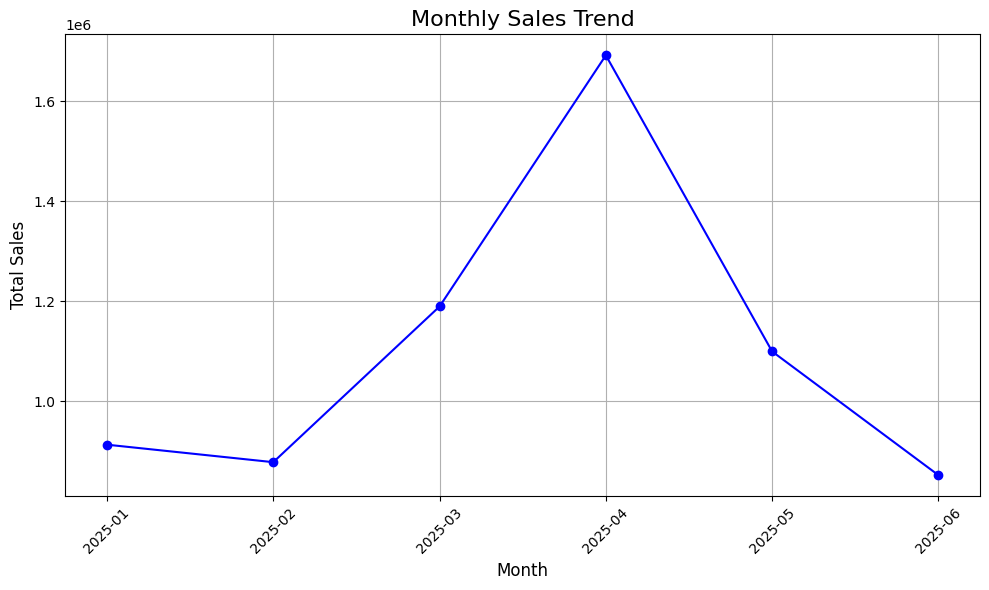

In [9]:
# Plot Monthly Sales

import matplotlib.pyplot as plt

# Ensure 'Month' is in string format for proper x-axis display
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', linestyle='-', color='blue')

# Titles and labels
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [10]:
# Customer-wise Total Purchase
ctp = df.groupby('Customer')['Sales'].sum()
print('Customer_Wise_purchase:',ctp)

Customer_Wise_purchase: Customer
Alice      501500
Bob        908500
Daisy      742000
Ethan      759500
Fiona     1165000
George     410500
Hannah    1256500
John       880500
Name: Sales, dtype: int64


In [11]:
# Top customer
top_customer = ctp.idxmax()
top_amount = ctp.max()
print(f"Top Customer: {top_customer}  ({top_amount} units)")

Top Customer: Hannah  (1256500 units)


In [12]:
#	Top 3 customers by sales
top_customers = (df.groupby('Customer')['Sales'].sum().nlargest(3).reset_index(name='Total Sales'))
print(top_customers)

  Customer  Total Sales
0   Hannah      1256500
1    Fiona      1165000
2      Bob       908500


In [13]:
#  Orders per Product
product_orders = df['Product'].value_counts()
print("Number of Orders per Product:", product_orders.head(10))

Number of Orders per Product: Product
Mouse         35
Headphones    33
Laptop        33
Monitor       30
Printer       27
Keyboard      25
Tablet        17
Name: count, dtype: int64


In [14]:
#	Day with highest sales
#  Ensure 'OrderDate' is in datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'], dayfirst=True)  # Use dayfirst=True if your dates are in DD-MM-YYYY

#  Group by date and sum the sales
daily_sales = df.groupby(df['OrderDate'].dt.date)['Sales'].sum()

#  Find the day with the maximum sales
max_sales_day = daily_sales.idxmax()
max_sales_amount = daily_sales.max()

#  Print result
print(f"Day with highest sales: {max_sales_day} ({max_sales_amount} units)")


Day with highest sales: 2025-04-23 (400000 units)


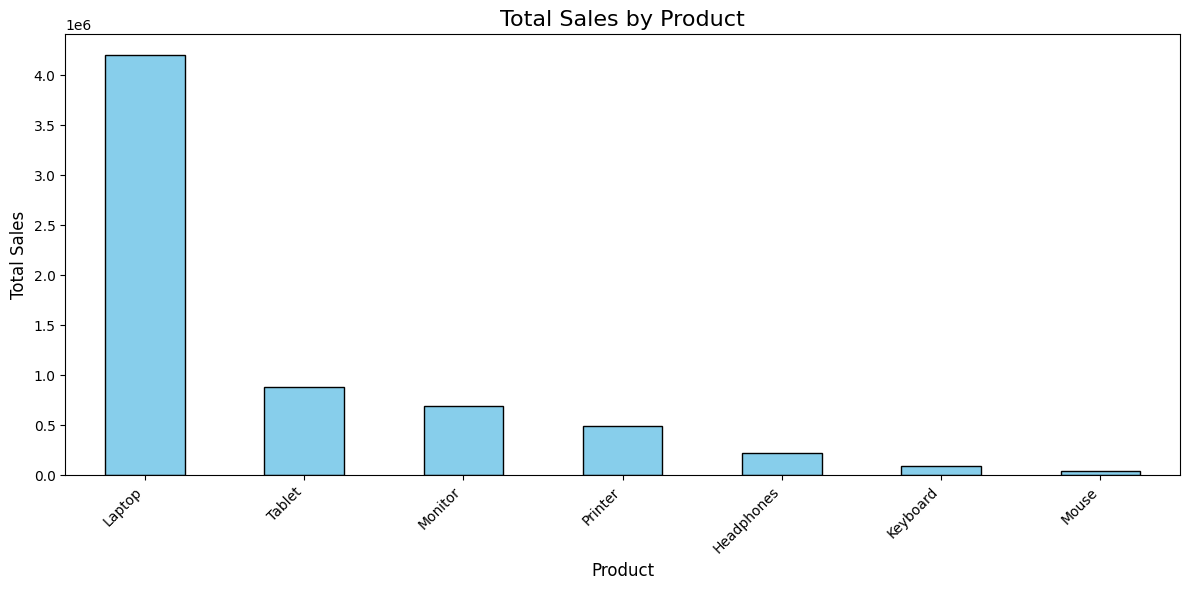

In [15]:
#	 plot – Sales by product
import matplotlib.pyplot as plt

#  Group sales by product
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

#  Plot the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)
product_sales.plot(kind='bar', color='skyblue', edgecolor='black')

#  Add chart details
plt.title('Total Sales by Product', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate product names for better visibility
plt.tight_layout()

#  Show the plot
plt.show()


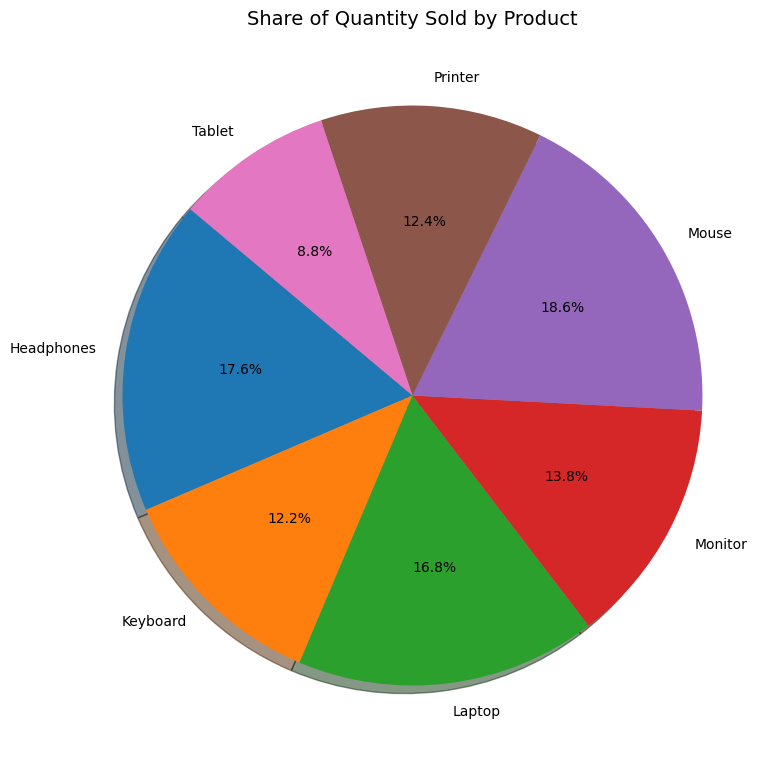

In [16]:
# chart – Share of each product
import matplotlib.pyplot as plt

#  Group by product and sum the quantity sold
product_quantity = df.groupby('Product')['Quantity'].sum()

#  Plot the pie chart
plt.figure(figsize=(8, 8))  # Square figure for a round pie
plt.pie(
    product_quantity,
    labels=product_quantity.index,
    autopct='%1.1f%%',     # Show percentage on slices
    startangle=140,        # Rotate start angle for better look
    shadow=True            # Adds a slight shadow
)

# S Add title and show chart
plt.title('Share of Quantity Sold by Product', fontsize=14)
plt.tight_layout()
plt.show()


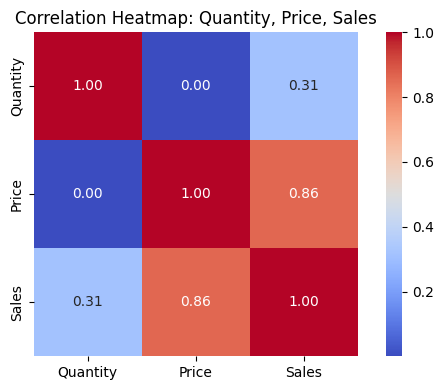

In [17]:
#  Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select relevant numeric columns
corr_df = df[['Quantity', 'Price', 'Sales']]

#  Compute correlation matrix
corr_matrix = corr_df.corr()

#  Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,        # Show correlation values
    cmap='coolwarm',   # Color gradient from blue to red
    fmt='.2f',         # Format decimals
    square=True        # Square cells
)

# Step 4: Add title and show plot
plt.title('Correlation Heatmap: Quantity, Price, Sales')
plt.tight_layout()
plt.show()
